# California Housing Price Prediction Project
#### James Bryant

## Objectives
The main objective of this project is to develop a predictive model for housing prices in California based on various features such as total rooms, population, median income, etc. The project aims to explore the relationship between these features and housing prices and build regression models to predict prices accurately.

# Housing Price Prediction Project

## Objectives
The main objective of this project is to develop a predictive model for housing prices in California based on various features such as total rooms, population, median income, etc. The project aims to explore the relationship between these features and housing prices and build regression models to predict prices accurately.

## Methodology
1. **Data Preprocessing**:
   - Loading the dataset
   - Handling missing values
   - Logarithmic transformation of skewed features
   - One-hot encoding of categorical variables
   
2. **Exploratory Data Analysis (EDA)**:
   - Visualizing distributions of key variables
   - Examining correlations between variables
   - Geographical analysis of housing prices
   
3. **Modeling**:
   - Implementing linear regression and random forest regression models
   - Hyperparameter tuning using grid search
   
4. **Model Evaluation**:
   - Calculating R^2 score and mean squared error for model performance
   
5. **Feature Engineering**:
   - Creating new features based on domain knowledge (room ratio, household rooms)
   
6. **User Interaction**:
   - Accepting user input to predict housing prices based on selected features
   
## Key Findings
- Strong positive correlation between median income and median house value
- Geographical areas with higher population density tend to have higher housing prices
- Random forest regression outperforms linear regression in terms of predictive accuracy


In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading the housing dataset from a CSV file into a pandas DataFrame
data = pd.read_csv("housing-2.csv")

# Displaying the loaded dataset to inspect its structure and contents
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
# Retrieving concise summary information about the DataFrame, including the data types, non-null counts, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Dropping rows with missing values (NaN) from the DataFrame in place
data.dropna(inplace=True)

In [5]:
# Importing train_test_split function from the scikit-learn library to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [6]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [7]:
# Splitting the dataset into training and testing sets using train_test_split function
# test_size=0.2 specifies that 20% of the data will be used for testing, and the rest for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
# Combining the features and target variable for the training set into a single DataFrame
train_data = X_train.join(y_train)

# Displaying the training data to inspect its structure and contents
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20029,-119.03,36.08,19.0,2736.0,549.0,1432.0,503.0,2.6944,INLAND,67700.0
2002,-119.78,36.75,31.0,1404.0,379.0,1515.0,387.0,1.2813,INLAND,56400.0
18583,-121.78,36.92,19.0,1515.0,253.0,975.0,266.0,4.3906,<1H OCEAN,241200.0
17298,-119.51,34.40,24.0,3422.0,596.0,1763.0,601.0,5.2039,NEAR OCEAN,301300.0
13516,-117.35,34.11,34.0,2104.0,388.0,1578.0,365.0,3.0833,INLAND,88400.0
...,...,...,...,...,...,...,...,...,...,...
473,-122.29,37.86,50.0,2485.0,607.0,1354.0,563.0,1.9483,NEAR BAY,150500.0
4338,-118.31,34.08,26.0,1609.0,534.0,1868.0,497.0,2.7038,<1H OCEAN,227100.0
10776,-117.90,33.65,30.0,2196.0,486.0,1131.0,460.0,4.4135,<1H OCEAN,272300.0
19888,-119.16,36.28,18.0,2377.0,414.0,1359.0,424.0,4.4000,INLAND,79300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

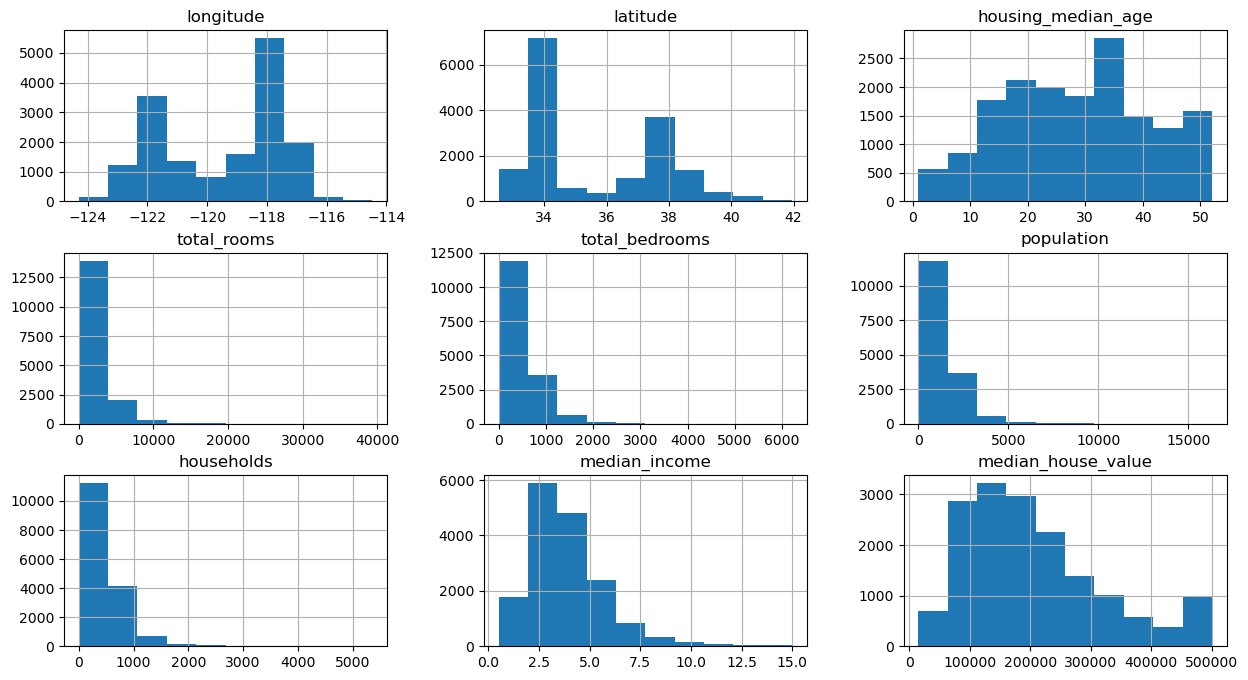

In [9]:
# Creating histograms for all columns in the training dataset with a specified figure size
train_data.hist(figsize=(15,8))

In [10]:
# Calculating the correlation matrix for the training dataset to examine pairwise relationships between variables
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924516,-0.113431,0.046219,0.071467,0.102438,0.057355,-0.016864,-0.043570
latitude,-0.924516,1.000000,0.016614,-0.035582,-0.067584,-0.110119,-0.072135,-0.077470,-0.146303
housing_median_age,-0.113431,0.016614,1.000000,-0.363253,-0.323945,-0.304944,-0.306201,-0.117248,0.102405
total_rooms,0.046219,-0.035582,-0.363253,1.000000,0.928917,0.860767,0.915497,0.197800,0.132072
total_bedrooms,0.071467,-0.067584,-0.323945,0.928917,1.000000,0.882108,0.977994,-0.007525,0.050396
population,0.102438,-0.110119,-0.304944,0.860767,0.882108,1.000000,0.912942,0.005342,-0.026704
households,0.057355,-0.072135,-0.306201,0.915497,0.977994,0.912942,1.000000,0.012883,0.065077
median_income,-0.016864,-0.077470,-0.117248,0.197800,-0.007525,0.005342,0.012883,1.000000,0.685771
median_house_value,-0.043570,-0.146303,0.102405,0.132072,0.050396,-0.026704,0.065077,0.685771,1.000000


<Axes: >

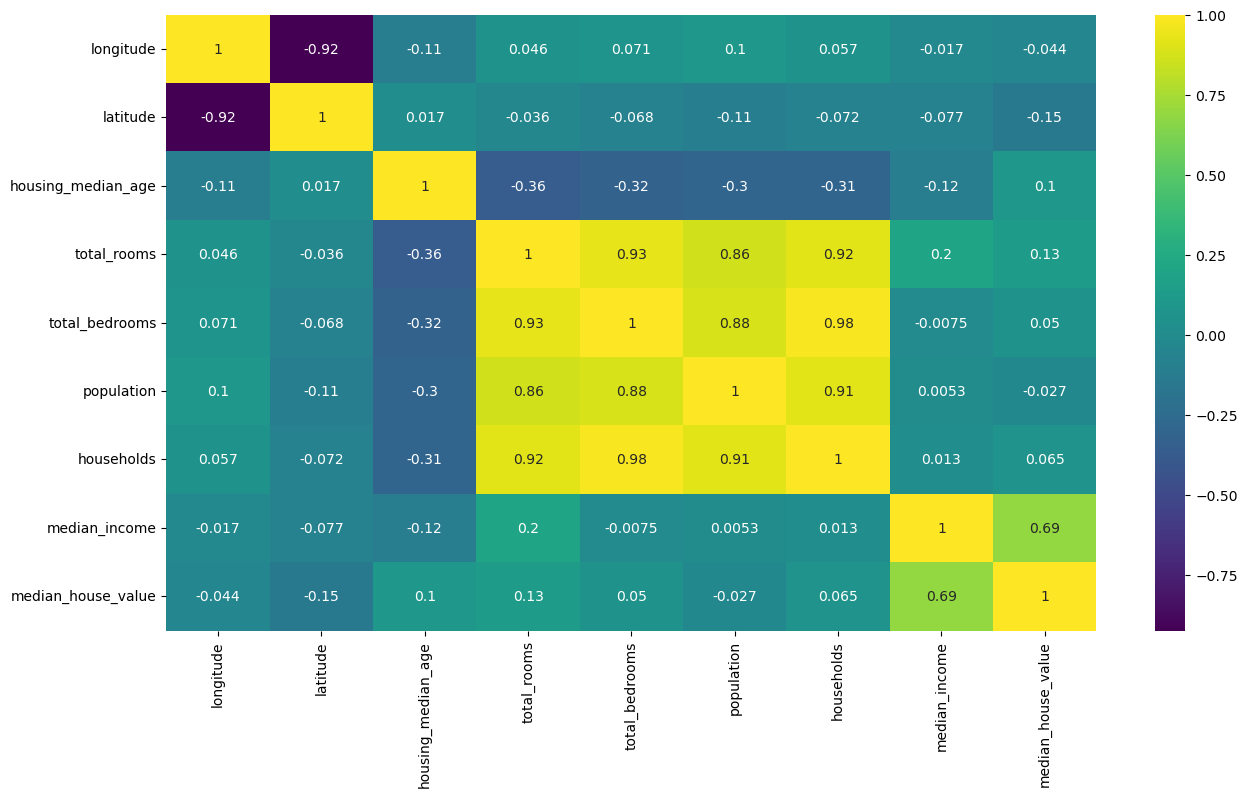

In [11]:
# Creating a heatmap of the correlation matrix for the training dataset using seaborn
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="viridis")

In [12]:
# Applying logarithmic transformation to selected features to handle skewed distributions
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

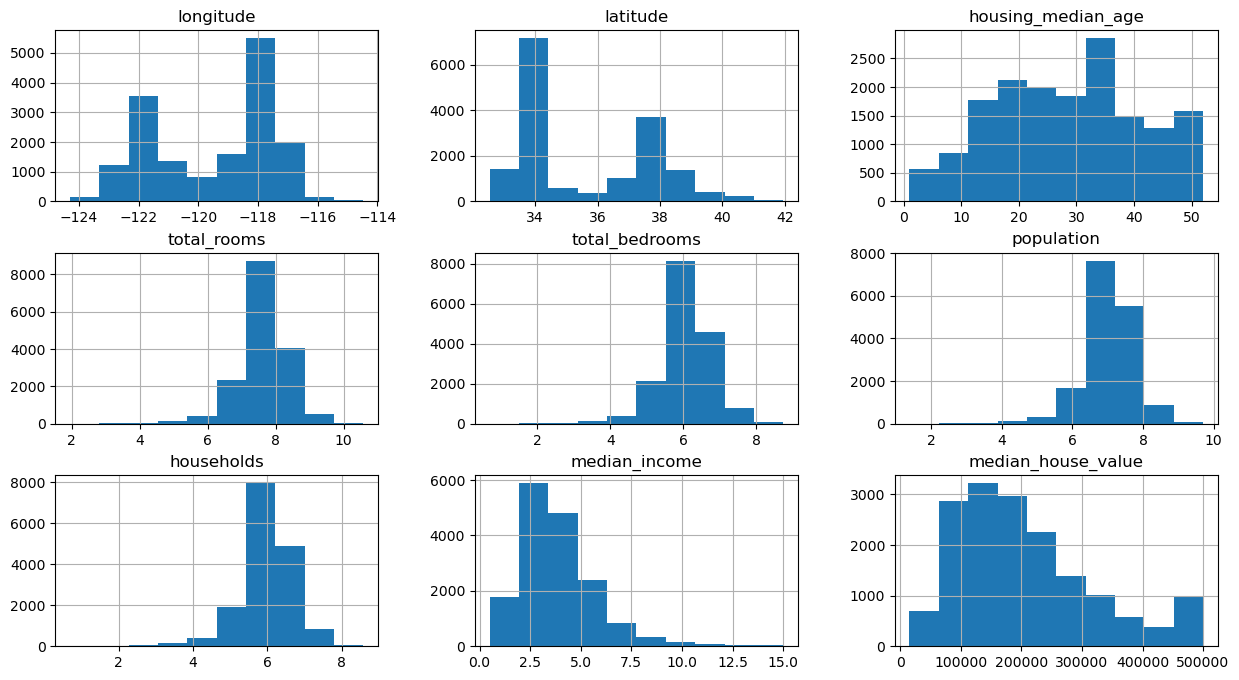

In [13]:
# Creating histograms for all columns in the transformed training dataset with a specified figure size
train_data.hist(figsize=(15,8))

In [14]:
# Encoding categorical variable 'ocean_proximity' using one-hot encoding and joining the resulting dummy variables to the training dataset
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# Displaying the modified training dataset after one-hot encoding
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20029,-119.03,36.08,19.0,7.914618,6.309918,7.267525,6.222576,2.6944,67700.0,0,1,0,0,0
2002,-119.78,36.75,31.0,7.247793,5.940171,7.323831,5.961005,1.2813,56400.0,0,1,0,0,0
18583,-121.78,36.92,19.0,7.323831,5.537334,6.883463,5.587249,4.3906,241200.0,1,0,0,0,0
17298,-119.51,34.40,24.0,8.138273,6.391917,7.475339,6.400257,5.2039,301300.0,0,0,0,0,1
13516,-117.35,34.11,34.0,7.652071,5.963579,7.364547,5.902633,3.0833,88400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,-122.29,37.86,50.0,7.818430,6.410175,7.211557,6.335054,1.9483,150500.0,0,0,0,1,0
4338,-118.31,34.08,26.0,7.383989,6.282267,7.533159,6.210600,2.7038,227100.0,1,0,0,0,0
10776,-117.90,33.65,30.0,7.694848,6.188264,7.031741,6.133398,4.4135,272300.0,1,0,0,0,0
19888,-119.16,36.28,18.0,7.774015,6.028279,7.215240,6.052089,4.4000,79300.0,0,1,0,0,0


<Axes: >

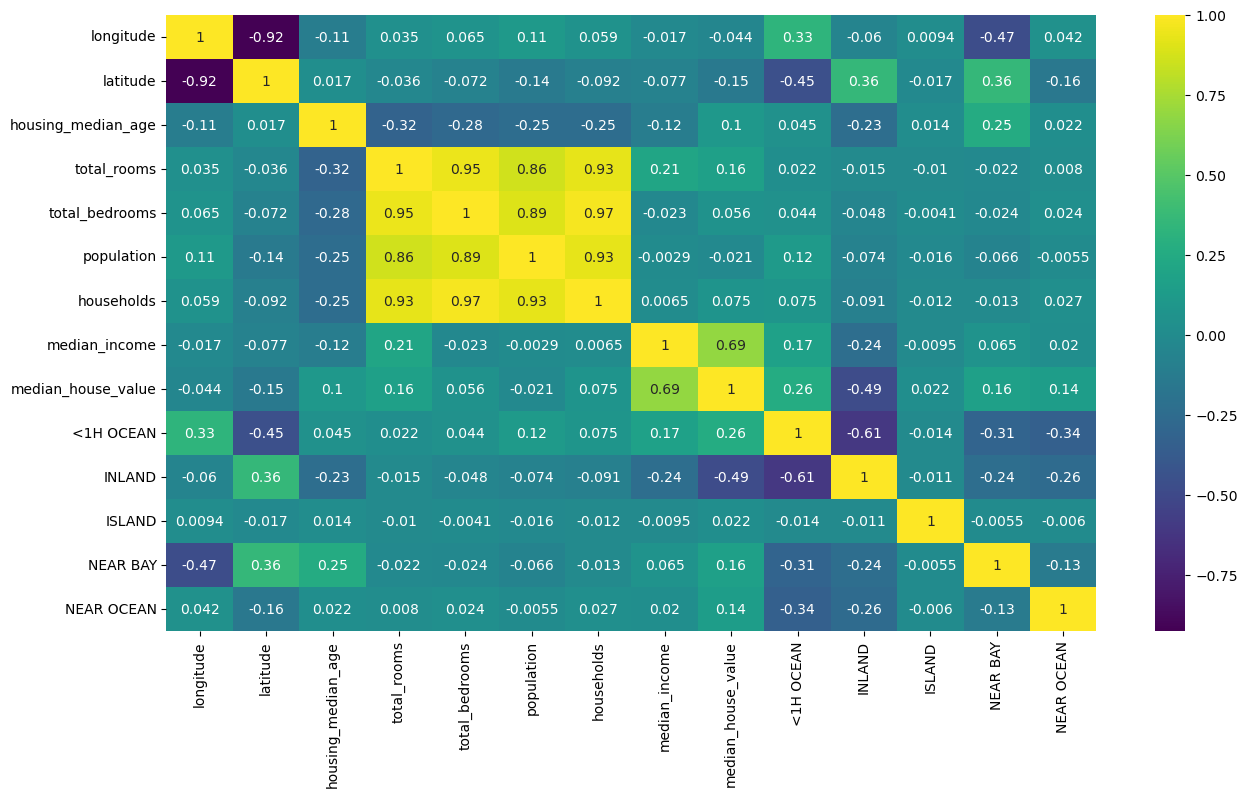

In [15]:
# Creating a heatmap of the correlation matrix for the modified training dataset after one-hot encoding using seaborn
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="viridis")

<Axes: xlabel='latitude', ylabel='longitude'>

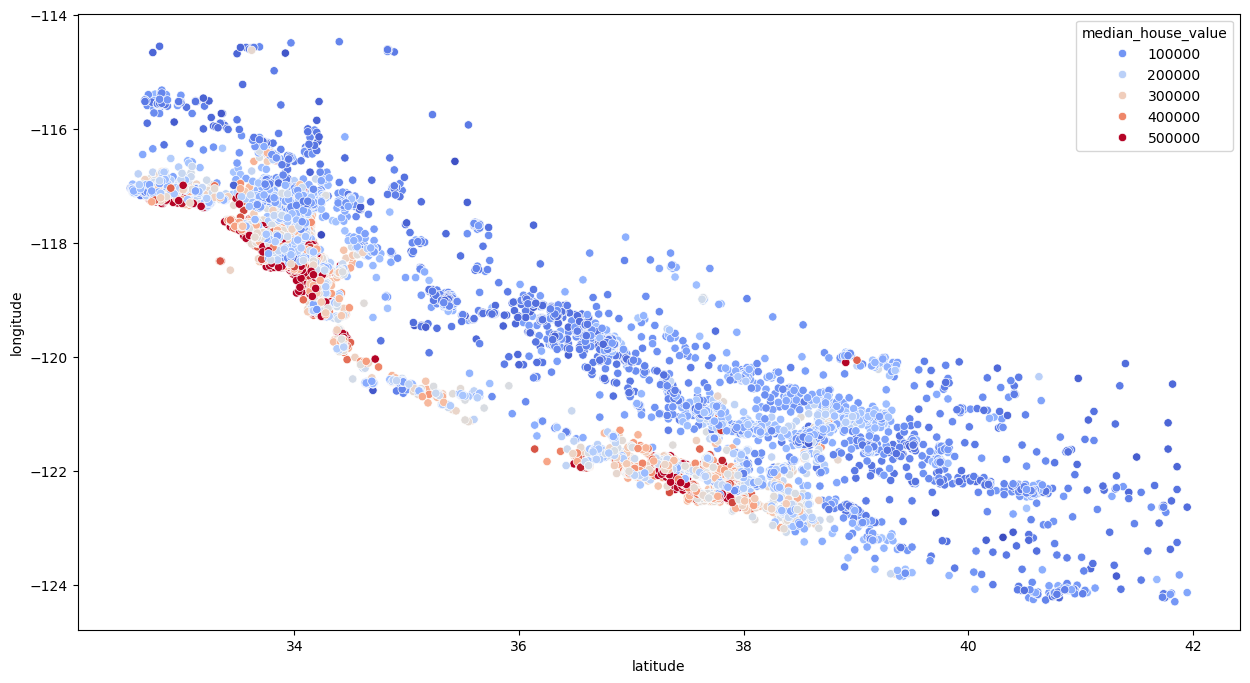

In [16]:
# Creating a scatter plot to visualize the geographical distribution of housing prices (median_house_value) based on latitude and longitude
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [17]:
# Calculating additional features by performing mathematical operations on existing features
train_data['room_ratio'] = train_data['total_rooms']/train_data['total_bedrooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

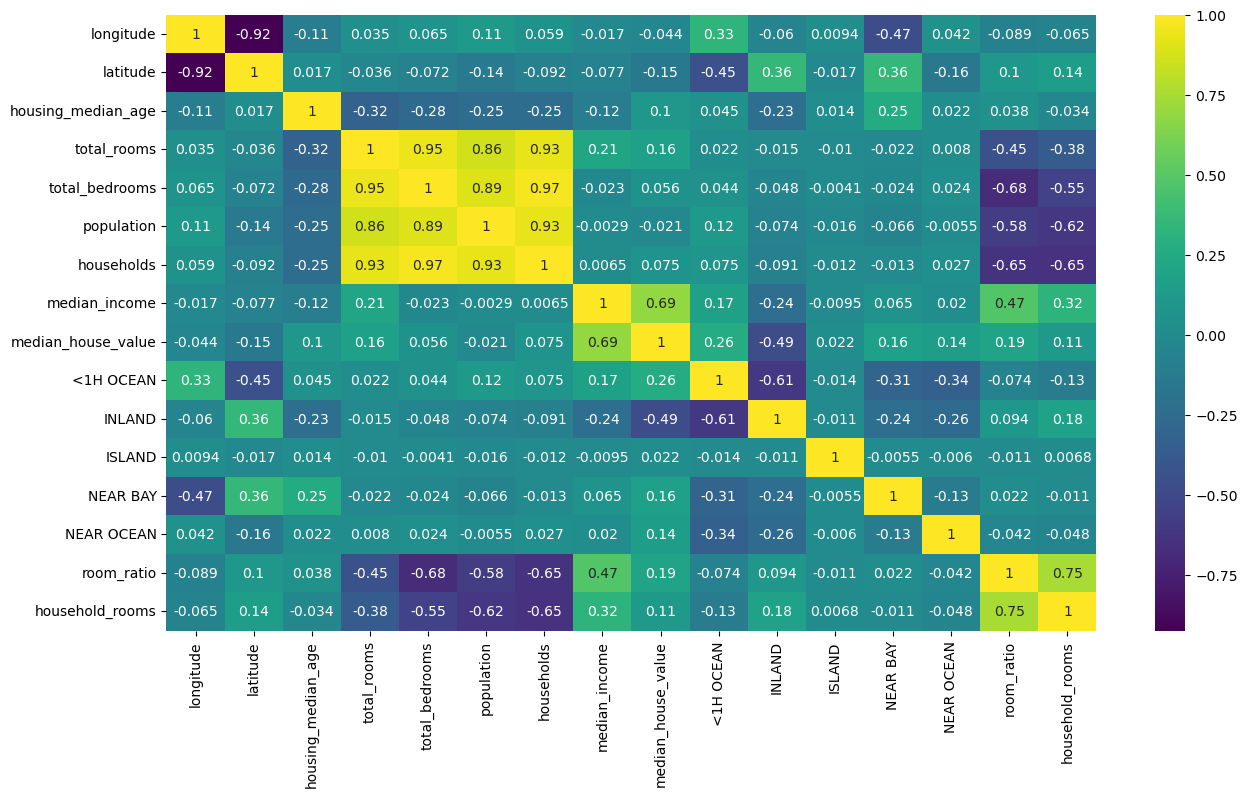

In [18]:
# Creating a heatmap of the correlation matrix for the training dataset after adding new features using seaborn
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="viridis")

In [19]:
# Importing necessary modules from scikit-learn for linear regression and data preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Instantiating StandardScaler to standardize features
scaler = StandardScaler()

# Separating features (X_train) and target variable (y_train) from the training dataset, excluding 'median_house_value' and 'ISLAND' columns
X_train,y_train = train_data.drop(['median_house_value','ISLAND'], axis=1),train_data['median_house_value']

# Standardizing the features using StandardScaler
X_train_s = scaler.fit_transform(X_train)

# Instantiating LinearRegression model and fitting it to the standardized training data
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [20]:
# Combining features and target variable for the testing set into a single DataFrame
test_data = X_test.join(y_test)

# Applying logarithmic transformation to selected features in the testing set to handle skewed distributions
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

# Encoding categorical variable 'ocean_proximity' in the testing set using one-hot encoding and joining the resulting dummy variables
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# Calculating additional features in the testing set by performing mathematical operations on existing features
test_data['room_ratio'] = test_data['total_rooms']/test_data['total_bedrooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [21]:
# Displaying the modified testing dataset after preprocessing
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,household_rooms
2362,-119.58,36.83,13.0,8.721928,6.761573,7.813592,6.652863,5.4895,156700.0,0,1,0,0,0,1.289926,1.311004
12583,-121.43,38.52,30.0,8.204672,6.852243,7.981392,6.802395,1.3927,78300.0,0,1,0,0,0,1.197370,1.206145
4494,-118.21,34.06,52.0,6.154858,4.753590,6.075346,4.820282,2.0950,109100.0,1,0,0,0,0,1.294781,1.276867
12792,-121.46,38.65,14.0,8.060856,6.313548,7.488853,6.280396,3.8125,92600.0,0,1,0,0,0,1.276755,1.283495
10443,-117.60,33.42,23.0,7.817223,6.135565,6.955593,6.054439,4.6650,280600.0,0,0,0,0,1,1.274084,1.291156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,-118.48,34.16,30.0,8.162801,6.285998,7.264030,6.265301,6.7082,500001.0,1,0,0,0,0,1.298569,1.302859
18878,-122.24,38.07,13.0,8.603738,7.085901,7.992269,6.986566,2.6098,162500.0,0,0,0,1,0,1.214205,1.231469
5333,-118.45,34.04,19.0,8.111028,6.918695,7.516433,6.820016,3.0173,393800.0,1,0,0,0,0,1.172335,1.189297
6948,-118.08,33.99,36.0,7.613325,6.381816,7.615298,6.352629,2.8152,163900.0,1,0,0,0,0,1.192972,1.198453


In [22]:
# Separating features (X_test) and target variable (y_test) from the modified testing dataset
X_test,y_test = test_data.drop(['median_house_value'], axis=1),test_data['median_house_value']

In [23]:
# Checking if 'ISLAND' column exists in the testing dataset, if not, adding it with all values as 0
if 'ISLAND' not in test_data.columns:
    test_data['ISLAND'] = 0

# Printing the columns of the testing dataset after checking and adding 'ISLAND' column if necessary
print(test_data.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'room_ratio', 'household_rooms'],
      dtype='object')


In [24]:
# Print unique feature names in the training and testing datasets
print("Unique feature names in the training dataset:", X_train.columns)
print("Unique feature names in the testing dataset:", X_test.columns)


Unique feature names in the training dataset: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'room_ratio',
       'household_rooms'],
      dtype='object')
Unique feature names in the testing dataset: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'room_ratio',
       'household_rooms'],
      dtype='object')


In [25]:
# Reindexing the columns of the testing dataset to match the order of columns in the training dataset
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Transform both training and testing datasets using the fitted scaler
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)



In [26]:
# Calculating the R^2 score of the linear regression model on the standardized testing data
reg.score(X_test_s, y_test)

0.6851408382908369

In [27]:
# Importing RandomForestRegressor from scikit-learn for random forest regression modeling
from sklearn.ensemble import RandomForestRegressor

# Instantiating RandomForestRegressor model
forest = RandomForestRegressor()

# Fitting the RandomForestRegressor model to the training data
forest.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
# Calculating the R^2 score of the random forest regression model on the testing data
forest.score(X_test, y_test)

0.8225764724963627

In [ ]:
# Importing RandomForestRegressor and GridSearchCV from scikit-learn for hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Defining the grid of hyperparameters for tuning
param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4, 6, 8]}
# Instantiating RandomForestRegressor model
forest = RandomForestRegressor()

# Instantiating GridSearchCV to perform hyperparameter tuning using cross-validation
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

# Fitting the GridSearchCV object to the standardized training data
grid_search.fit(X_train_s, y_train)

In [ ]:
# Extracting the best performing RandomForestRegressor model from the grid search
best_forest = grid_search.best_estimator_

In [ ]:
# Calculating the R^2 score of the best performing RandomForestRegressor model on the standardized testing data
best_forest.score(X_test_s, y_test)

In [ ]:
# Printing the columns of the testing dataset
test_data.columns

In [ ]:
# Defining a list of selected features
selected_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Function to get customer input for selected features
def get_customer_input():
    features = {}
    for feature in selected_features:
        features[feature] = float(input(f"Enter value for {feature}: "))
    return features

# Getting customer input for selected features
customer_input = get_customer_input()

# Creating a DataFrame with customer input data for selected features
input_data_selected = pd.DataFrame(customer_input, index=[0])[selected_features]

# Instantiating LinearRegression model and fitting it to the training data with selected features
reg_selected = LinearRegression()
reg_selected.fit(X_train[selected_features], y_train)

# Predicting house prices using the trained regression model with selected features
predicted_price_regression_selected = reg_selected.predict(input_data_selected)

# Displaying the predicted price using regression model with selected features
print("Predicted price using regression model with selected features:", predicted_price_regression_selected)

In [ ]:
# Importing RandomForestRegressor from scikit-learn for random forest regression modeling
from sklearn.ensemble import RandomForestRegressor

# Defining a list of selected features
selected_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Function to get customer input for selected features
def get_customer_input():
    features = {}
    for feature in selected_features:
        features[feature] = float(input(f"Enter value for {feature}: "))
    return features

# Getting customer input for selected features
customer_input = get_customer_input()

# Creating a DataFrame with customer input data for selected features
input_data_selected = pd.DataFrame(customer_input, index=[0])[selected_features]

# Instantiating RandomForestRegressor model and fitting it to the training data with selected features
forest_selected = RandomForestRegressor()
forest_selected.fit(X_train[selected_features], y_train)

# Predicting house prices using the trained random forest model with selected features
predicted_price_forest_selected = forest_selected.predict(input_data_selected)

# Displaying the predicted price using random forest model with selected features
print("Predicted price using random forest model with selected features:", predicted_price_forest_selected)
print("Input data for prediction:")